# Bike Ride Sharing Project : Prophet


---



This project utilizes Facebook Prophet to forecast bike-sharing demand for the years 2011-2012 in Washington, DC. The model incorporates advanced techniques such as cross-validation, holiday adjustments, and hyperparameter tuning to ensure accurate and reliable predictions. By leveraging seasonal features, weather-based regressors, and robust
evaluation metrics, the project aims to provide actionable insights into demand patterns for better resource planning and management.

---



# Libraries and Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Python - Time Series Forecasting/Modern Time Series Forecasting Techniques/Prophet

/content/drive/MyDrive/Python - Time Series Forecasting/Modern Time Series Forecasting Techniques/Prophet


In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import ParameterGrid

In [ ]:
# Loading the Data and Setting the Index
df = pd.read_csv("Daily Bike Sharing training.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In Prophet, we don't convert date into index, but considers it as a column.

In [ ]:
# Information about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     701 non-null    int64  
 1   dteday      701 non-null    object 
 2   season      701 non-null    int64  
 3   yr          701 non-null    int64  
 4   mnth        701 non-null    int64  
 5   holiday     701 non-null    int64  
 6   weekday     701 non-null    int64  
 7   workingday  701 non-null    int64  
 8   weathersit  701 non-null    int64  
 9   temp        701 non-null    float64
 10  atemp       701 non-null    float64
 11  hum         701 non-null    float64
 12  windspeed   701 non-null    float64
 13  casual      701 non-null    int64  
 14  registered  701 non-null    int64  
 15  cnt         701 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 87.8+ KB


In [ ]:
df = df.rename(columns = {'cnt' : 'y', 'dteday' : 'ds'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     701 non-null    int64         
 1   ds          701 non-null    datetime64[ns]
 2   season      701 non-null    int64         
 3   yr          701 non-null    int64         
 4   mnth        701 non-null    int64         
 5   holiday     701 non-null    int64         
 6   weekday     701 non-null    int64         
 7   workingday  701 non-null    int64         
 8   weathersit  701 non-null    int64         
 9   temp        701 non-null    float64       
 10  atemp       701 non-null    float64       
 11  hum         701 non-null    float64       
 12  windspeed   701 non-null    float64       
 13  casual      701 non-null    int64         
 14  registered  701 non-null    int64         
 15  y           701 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
# Prepare the weather situation Variable
weather_sit = pd.get_dummies(df['weathersit'], drop_first=True)

In [ ]:
df = pd.concat([df,weather_sit], axis=1)

In [ ]:
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,True,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,True,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False,False


In [ ]:
df = df.rename(columns = {2: 'weather_sit_2', 3 : 'weather_sit_3'})

In [ ]:
df.drop(columns = ['instant', 'season','yr', 'mnth', 'weekday','casual','registered','weathersit', 'weekday'], inplace = True)

In [ ]:
# Replace the value of 29th October 2012 with 28th October
to_replace = df.loc[df['ds'] == '2012-10-28'].y.values[0]

In [ ]:
df[df.ds == '2012-10-29'].y.values[0] == to_replace

False

In [ ]:
df.loc[df['ds'] == '2012-10-29','y'] = to_replace
df.loc[df['ds'] == '2012-10-30','y'] = to_replace

We are replacing the y value of 29th and 30th October, 2012, with the value on 28th October, to take care of the unusual event(Hurricane) on the 29th Oct, 2012.

In [ ]:
df.loc[df.ds == '2012-10-30']

,ds,holiday,workingday,temp,atemp,hum,windspeed,y,weather_sit_2,weather_sit_3
668,2012-10-30,0,1,0.318182,0.309909,0.825455,0.213009,4459,True,False


# Exploratory Data Analysis

In [ ]:
# Creating a copy of dataframe
df_temp = df.copy()

In [ ]:
df_temp.set_index('ds', inplace = True)

In [ ]:
df_temp.head()

,holiday,workingday,temp,atemp,hum,windspeed,y,weather_sit_2,weather_sit_3
ds,,,,,,,,,
2011-01-01,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False
2011-01-02,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False
2011-01-03,0,1,0.196364,0.189405,0.437273,0.248309,1349,False,False
2011-01-04,0,1,0.200000,0.212122,0.590435,0.160296,1562,False,False
2011-01-05,0,1,0.226957,0.229270,0.436957,0.186900,1600,False,False


In [ ]:
df_temp.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-11-22', '2012-11-23', '2012-11-24', '2012-11-25',
               '2012-11-26', '2012-11-27', '2012-11-28', '2012-11-29',
               '2012-11-30', '2012-12-01'],
              dtype='datetime64[ns]', name='ds', length=701, freq=None)

In [ ]:
df_temp = df_temp.asfreq('D')

In [ ]:
df_temp.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-11-22', '2012-11-23', '2012-11-24', '2012-11-25',
               '2012-11-26', '2012-11-27', '2012-11-28', '2012-11-29',
               '2012-11-30', '2012-12-01'],
              dtype='datetime64[ns]', name='ds', length=701, freq='D')

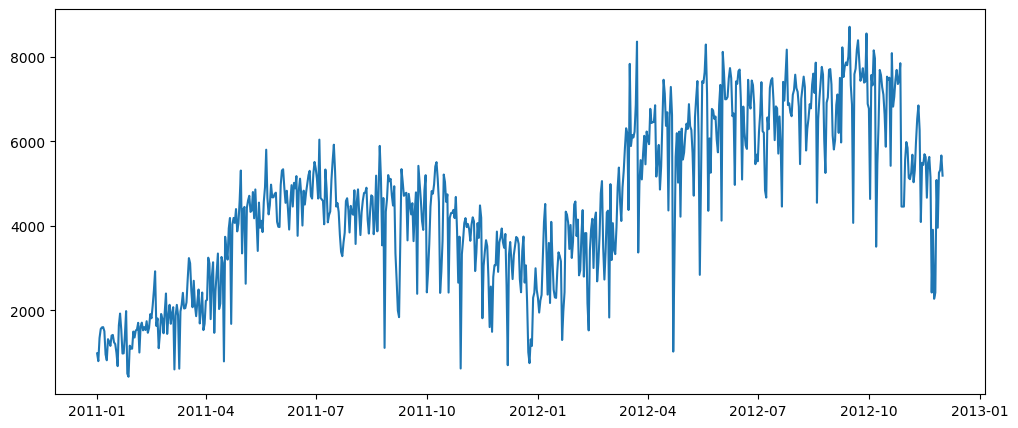

In [ ]:
plt.figure(figsize = (12,5))
plt.plot(df_temp['y'], label = 'Daily Demand')

<Figure size 1200x400 with 0 Axes>

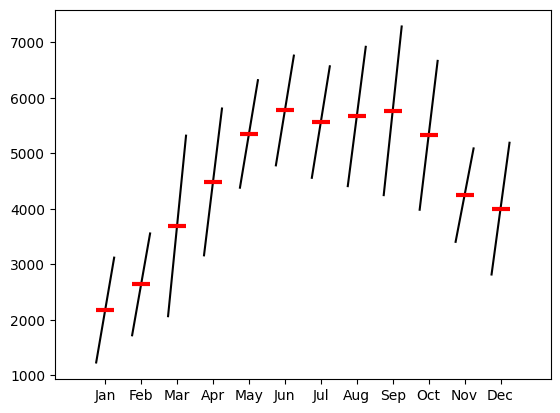

In [ ]:
plt.figure(figsize = (12,4))
month_plot(df_temp['y'].resample('ME').mean())
plt.show()

<ipython-input-27-87b1158c589c>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df_temp['y'].resample('Q').mean())


<Figure size 1200x600 with 0 Axes>

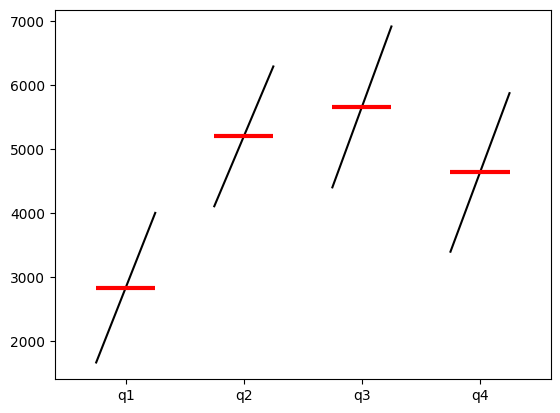

In [ ]:
plt.figure(figsize = (12,6))
quarter_plot(df_temp['y'].resample('Q').mean())
plt.show()

<Figure size 1500x600 with 0 Axes>

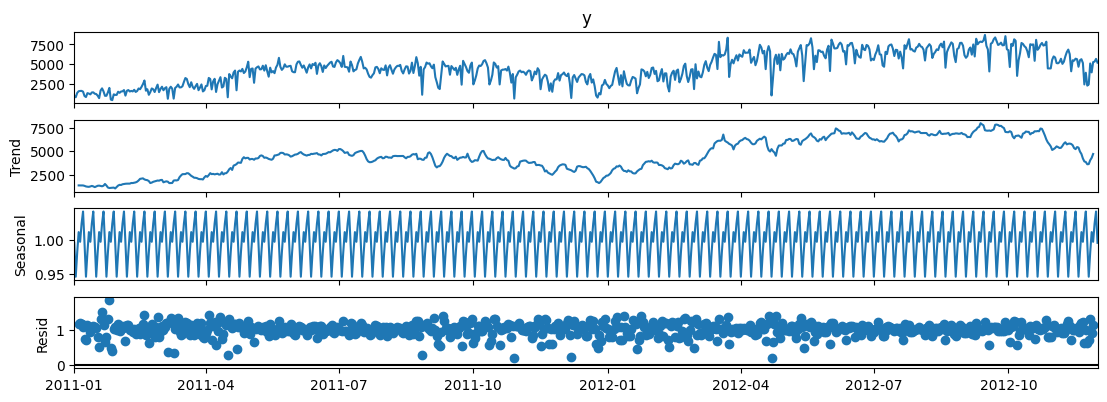

In [ ]:
plt.figure(figsize = (15,6))
decompose = seasonal_decompose(df_temp['y'],model='mul', period = 7)
fig = decompose.plot()
fig.set_size_inches(12,4)
plt.show()

<Figure size 1500x600 with 0 Axes>

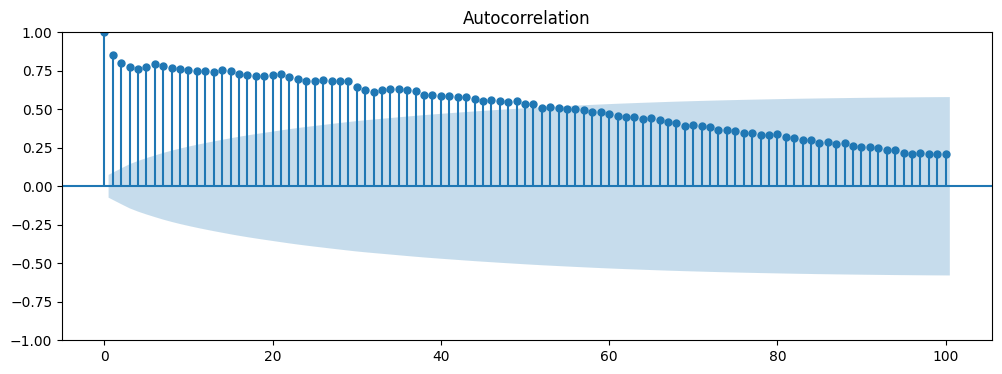

In [ ]:
plt.figure(figsize = (15,6))
fig = plot_acf(df_temp['y'], lags = 100)
fig.set_size_inches(12,4)
plt.show()

<Figure size 1500x600 with 0 Axes>

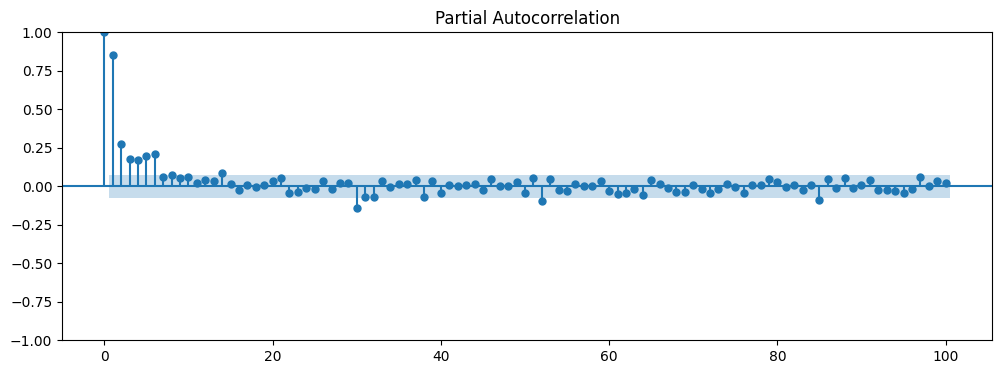

In [ ]:
plt.figure(figsize = (15,6))
fig = plot_pacf(df_temp['y'], lags = 100)
fig.set_size_inches(12,4)
plt.show()

# Holidays

In [ ]:
df.head()

,ds,holiday,workingday,temp,atemp,hum,windspeed,y,weather_sit_2,weather_sit_3
0,2011-01-01,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False
1,2011-01-02,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False
2,2011-01-03,0,1,0.196364,0.189405,0.437273,0.248309,1349,False,False
3,2011-01-04,0,1,0.200000,0.212122,0.590435,0.160296,1562,False,False
4,2011-01-05,0,1,0.226957,0.229270,0.436957,0.186900,1600,False,False


In [ ]:
# Check the holidays in our df
df[df['holiday'] == 1].ds

,ds
16,2011-01-17
51,2011-02-21
104,2011-04-15
149,2011-05-30
184,2011-07-04
247,2011-09-05
282,2011-10-10
314,2011-11-11
327,2011-11-24
359,2011-12-26


In [ ]:
gen_holidays = pd.DataFrame({'holiday' : 'gen_holi',
                             'ds' : df[df['holiday'] == 1].ds,
                             'lower_window' : -2,
                             'upper_window' : 2})

xmas = pd.DataFrame({'holiday': 'Christmas',
                     'ds' : pd.to_datetime(['2011-12-24','2012-12-24']),
                     'lower_window' : -5,
                     'upper_window' : 3})

nye = pd.DataFrame({'holiday': 'New Year',
                     'ds' : pd.to_datetime(['2011-12-31','2012-12-31']),
                     'lower_window' : -3,
                     'upper_window': 3})

easter = pd.DataFrame({'holiday': 'Easter',
                     'ds' : pd.to_datetime(['2011-04-24','2012-04-08']),
                      'lower_window' : -3,
                      'upper_window': 3})

holidays = pd.concat([gen_holidays, xmas, nye, easter])


In [ ]:
holidays

,holiday,ds,lower_window,upper_window
16,gen_holi,2011-01-17,-2,2
51,gen_holi,2011-02-21,-2,2
104,gen_holi,2011-04-15,-2,2
149,gen_holi,2011-05-30,-2,2
184,gen_holi,2011-07-04,-2,2
247,gen_holi,2011-09-05,-2,2
282,gen_holi,2011-10-10,-2,2
314,gen_holi,2011-11-11,-2,2
327,gen_holi,2011-11-24,-2,2
359,gen_holi,2011-12-26,-2,2


# Feature Engineering

In [ ]:
# Thought process
# A person might take decision of renting a bike tomorrow, based on today's  weather.

In [ ]:
for lag in [1,2,3,4,5,6,7]:
  df[f'temp_lag_{lag}'] = df['temp'].shift(lag)
  df[f'atemp_lag_{lag}'] = df['atemp'].shift(lag)

In [ ]:
df.corr()

,ds,holiday,workingday,temp,atemp,hum,windspeed,y,weather_sit_2,weather_sit_3,...,temp_lag_3,atemp_lag_3,temp_lag_4,atemp_lag_4,temp_lag_5,atemp_lag_5,temp_lag_6,atemp_lag_6,temp_lag_7,atemp_lag_7
ds,1.000000,0.015117,-0.001623,0.237163,0.239176,-0.009407,-0.123133,0.719768,-0.046198,-0.029047,...,0.247988,0.248997,0.251574,0.252722,0.255261,0.256619,0.258626,0.259517,0.263108,0.263900
holiday,0.015117,1.000000,-0.252561,-0.027242,-0.031453,-0.020553,0.008972,-0.059428,-0.028507,-0.029369,...,-0.005223,-0.003929,-0.010478,-0.011792,-0.037129,-0.040109,-0.051412,-0.052553,-0.067139,-0.067490
workingday,-0.001623,-0.252561,1.000000,0.051368,0.050852,0.031885,-0.024576,0.052378,0.055653,0.024072,...,-0.031627,-0.031957,-0.021707,-0.021994,0.007211,0.003307,0.042999,0.038476,0.065708,0.063817
temp,0.237163,-0.027242,0.051368,1.000000,0.991531,0.141174,-0.164458,0.631897,-0.081187,-0.056095,...,0.866095,0.854044,0.861434,0.848287,0.865148,0.852546,0.864810,0.852969,0.861513,0.851324
atemp,0.239176,-0.031453,0.050852,0.991531,1.000000,0.152682,-0.187429,0.634332,-0.078131,-0.061334,...,0.851235,0.840449,0.848710,0.836874,0.853912,0.842487,0.853325,0.842616,0.848964,0.839537
hum,-0.009407,-0.020553,0.031885,0.141174,0.152682,1.000000,-0.235741,-0.092640,0.489191,0.271073,...,0.089671,0.088478,0.095648,0.091861,0.103995,0.099663,0.108906,0.108209,0.102180,0.104936
windspeed,-0.123133,0.008972,-0.024576,-0.164458,-0.187429,-0.235741,1.000000,-0.228405,-0.026734,0.109817,...,-0.149280,-0.142687,-0.166318,-0.160544,-0.161423,-0.156378,-0.158894,-0.153156,-0.156261,-0.144682
y,0.719768,-0.059428,0.052378,0.631897,0.634332,-0.092640,-0.228405,1.000000,-0.166506,-0.217576,...,0.581922,0.577076,0.585163,0.580973,0.589976,0.587374,0.595346,0.592397,0.595830,0.591886
weather_sit_2,-0.046198,-0.028507,0.055653,-0.081187,-0.078131,0.489191,-0.026734,-0.166506,1.000000,-0.119755,...,-0.065440,-0.070180,-0.069589,-0.069384,-0.072992,-0.071661,-0.076445,-0.073907,-0.072378,-0.081588
weather_sit_3,-0.029047,-0.029369,0.024072,-0.056095,-0.061334,0.271073,0.109817,-0.217576,-0.119755,1.000000,...,-0.053564,-0.050190,-0.045915,-0.041493,-0.024898,-0.023014,-0.026275,-0.026819,-0.031642,-0.026945


In [ ]:
df = df.iloc[:,:11]
df.head()

,ds,holiday,workingday,temp,atemp,hum,windspeed,y,weather_sit_2,weather_sit_3,temp_lag_1
0,2011-01-01,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN
1,2011-01-02,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False,0.344167
2,2011-01-03,0,1,0.196364,0.189405,0.437273,0.248309,1349,False,False,0.363478
3,2011-01-04,0,1,0.200000,0.212122,0.590435,0.160296,1562,False,False,0.196364
4,2011-01-05,0,1,0.226957,0.229270,0.436957,0.186900,1600,False,False,0.200000


# Prophet Model

In [ ]:
df.head(1)

,ds,holiday,workingday,temp,atemp,hum,windspeed,y,weather_sit_2,weather_sit_3,temp_lag_1
0,2011-01-01,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False,NaN


In [ ]:
# Remove any NAs
df = df.dropna()

In [ ]:
from prophet import Prophet

In [ ]:
# Building the Prophet Model
m = Prophet(yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=True,
            holidays = holidays,
            seasonality_mode='multiplicative',
            seasonality_prior_scale= 10,
            holidays_prior_scale= 10,
            changepoint_prior_scale= 0.05)

m.add_regressor('workingday')
m.add_regressor('temp')
m.add_regressor('atemp')
m.add_regressor('hum')
m.add_regressor('windspeed')
m.add_regressor('weather_sit_2')
m.add_regressor('weather_sit_3')
m.add_regressor('temp_lag_1')

m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/kiv1co7n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/lki05ncw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79410', 'data', 'file=/tmp/tmp6gs6f14f/kiv1co7n.json', 'init=/tmp/tmp6gs6f14f/lki05ncw.json', 'output', 'file=/tmp/tmp6gs6f14f/prophet_modelmsz06luy/prophet_model-20250124123738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Regressor Coefficients

from prophet.utilities import regressor_coefficients
regressor_coefficients(m)

,regressor,regressor_mode,center,coef_lower,coef,coef_upper
0,workingday,multiplicative,0.000000,0.142201,0.142201,0.142201
1,temp,multiplicative,0.502959,1.561403,1.561403,1.561403
2,atemp,multiplicative,0.481015,0.604339,0.604339,0.604339
3,hum,multiplicative,0.625459,-0.609555,-0.609555,-0.609555
4,windspeed,multiplicative,0.190577,-0.846086,-0.846086,-0.846086
5,weather_sit_2,multiplicative,0.000000,-0.157436,-0.157436,-0.157436
6,weather_sit_3,multiplicative,0.000000,-0.622127,-0.622127,-0.622127
7,temp_lag_1,multiplicative,0.503024,-0.838133,-0.838133,-0.838133


In [ ]:
# Function to interpret the coefficient results
def interpret_prophet_coefficients(df):
    interpretations = []

    # Iterate through each row in the DataFrame 'df'
    for _, row in df.iterrows():
        regressor = row['regressor']  # Get the regressor name
        mode = row['regressor_mode']  # Get the regressor mode (multiplicative or additive)
        coef = row['coef']  # Get the coefficient value
        effect_type = 'increase' if coef > 0 else 'decrease'  # Determine if the effect is an increase or decrease

        # Generate interpretation based on the regressor mode
        if mode == 'multiplicative':
            interpretation = f"For each unit increase in {regressor}, the target variable is expected to {effect_type} by {abs(coef) * 100:.2f}% (multiplicatively)."
        elif mode == 'additive':
            interpretation = f"For each unit increase in {regressor}, the target variable changes by {coef:.2f} units (additively)."
        else:
            interpretation = f"Regressor {regressor} has an unrecognized mode '{mode}'."

        interpretations.append(interpretation)

    return interpretations

coefs = pd.DataFrame(regressor_coefficients(m))  # Get regressor coefficients from the Prophet model
interpretations = interpret_prophet_coefficients(coefs) # Generate interpretations based on coefficients

# Print each interpretation
for interpretation in interpretations:
    print(interpretation)

For each unit increase in workingday, the target variable is expected to increase by 14.22% (multiplicatively).
For each unit increase in temp, the target variable is expected to increase by 156.14% (multiplicatively).
For each unit increase in atemp, the target variable is expected to increase by 60.43% (multiplicatively).
For each unit increase in hum, the target variable is expected to decrease by 60.96% (multiplicatively).
For each unit increase in windspeed, the target variable is expected to decrease by 84.61% (multiplicatively).
For each unit increase in weather_sit_2, the target variable is expected to decrease by 15.74% (multiplicatively).
For each unit increase in weather_sit_3, the target variable is expected to decrease by 62.21% (multiplicatively).
For each unit increase in temp_lag_1, the target variable is expected to decrease by 83.81% (multiplicatively).


# Cross Validation

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
df.shape[0] - 180

520

In [ ]:
# Apply CV to the Model
df_cv = cross_validation(model=m,
                         horizon = '30 days',
                         period = '15 days',
                         initial = '521 days',
                         parallel = 'processes')

df_cv.head()

INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x78f26534f3d0>
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/cfld6p96.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/d6daw3yn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/xw6wb7z1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/7i3ju91g.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51733', 'data', 'file=/tmp/tmp6gs6f14f/cfld6p96.json', 'init=/tmp/tmp6gs6f14f/xw6wb7z1.json', 'output', 'file=/tmp/tmp6gs6f14f/prophet_modeln9zhyrgd/prophet_model-20250124123739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
DEBUG:cmdstanpy:idx 0
12:37:39 - cmdstanpy - INFO - Chain [1] start processing
DEBUG:cmdstanpy:runnin

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-06-20,8203.392863,7525.190257,8847.238097,6211,2012-06-19
1,2012-06-21,8484.764223,7763.428546,9241.957433,5905,2012-06-19
2,2012-06-22,8112.815958,7368.109625,8797.406645,5823,2012-06-19
3,2012-06-23,7718.436442,7018.882716,8399.984570,7458,2012-06-19
4,2012-06-24,7868.306390,7166.928654,8529.135921,6891,2012-06-19


In [ ]:
# Look at the CV output
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2012-06-20,8203.392863,7525.190257,8847.238097,6211,2012-06-19
1,2012-06-21,8484.764223,7763.428546,9241.957433,5905,2012-06-19
2,2012-06-22,8112.815958,7368.109625,8797.406645,5823,2012-06-19
3,2012-06-23,7718.436442,7018.882716,8399.984570,7458,2012-06-19
4,2012-06-24,7868.306390,7166.928654,8529.135921,6891,2012-06-19


In [ ]:
from prophet.diagnostics import performance_metrics

In [ ]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,1.573677e+06,1254.462721,969.389523,0.171172,0.125322,0.162184,0.500000
1,4 days,1.388489e+06,1178.341516,906.660100,0.152929,0.109979,0.148148,0.533333
2,5 days,1.473163e+06,1213.739133,958.955343,0.157498,0.109521,0.153140,0.500000
3,6 days,1.180663e+06,1086.583053,863.924277,0.135286,0.081196,0.136659,0.566667
4,7 days,1.301757e+06,1140.945611,894.008085,0.135583,0.081180,0.140020,0.600000
5,8 days,1.029205e+06,1014.497408,773.447326,0.109022,0.075934,0.116939,0.633333
6,9 days,9.722975e+05,986.051449,765.225859,0.108304,0.085255,0.114686,0.600000
7,10 days,1.370797e+06,1170.810336,856.152994,0.125013,0.088142,0.127640,0.566667
8,11 days,1.475688e+06,1214.778792,885.325590,0.133176,0.091222,0.133814,0.566667
9,12 days,1.920275e+06,1385.739982,1062.168952,0.167342,0.111737,0.170757,0.466667


In [ ]:
rmse = round(performance_metrics(df_cv)['rmse'].mean(),2)
print(f'RMSE : {rmse}')
mape = round(performance_metrics(df_cv)['mape'].mean()*100,3)
print(f'MAPE : {mape}%')

RMSE : 1287.07
MAPE : 16.321%


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


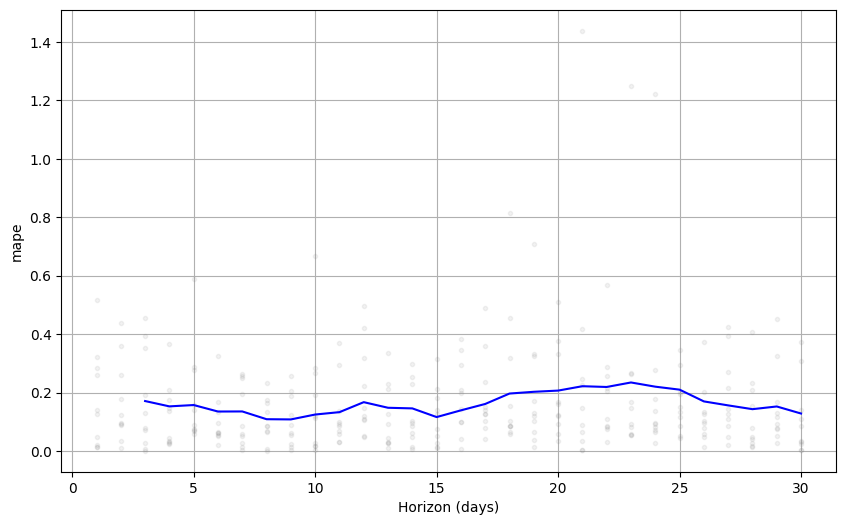

In [ ]:
# Plotting the metrics over time
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
fig.show()

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


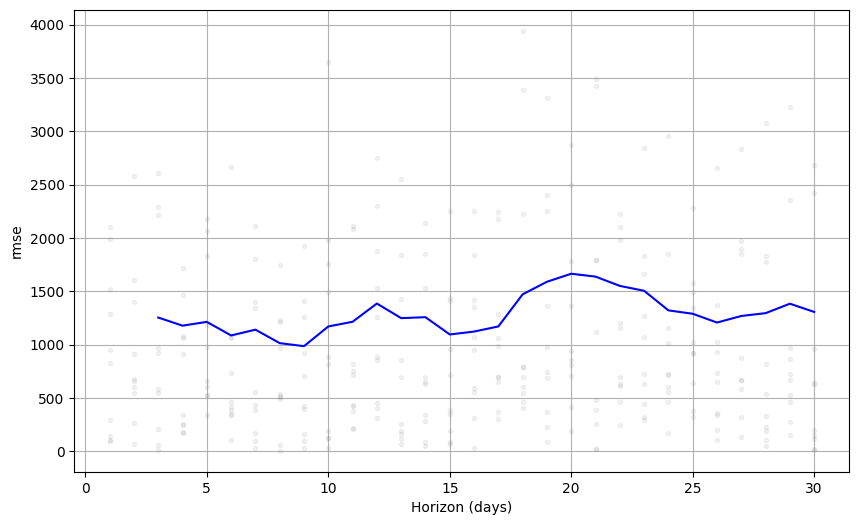

In [ ]:
# Plotting the metrics over time
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')
fig.show()

# Exploring the Error

In [ ]:
df_cv['deviation'] = df_cv['yhat'] - df_cv['y']
df_cv['deviation%'] = (df_cv['deviation'] / df_cv['y'] - 1)*100

In [ ]:
df_cv.sort_values(by = 'deviation%', ascending = False).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation%
290,2012-11-22,5912.573506,5124.330978,6757.046756,2425,2012-11-01,3487.573506,43.817464
292,2012-11-24,5122.346211,4292.348905,5899.621466,2277,2012-11-01,2845.346211,24.960308
293,2012-11-25,5381.559704,4588.507096,6227.299682,2424,2012-11-01,2957.559704,22.011539
17,2012-07-07,8782.396220,8098.628905,9507.379331,4840,2012-06-19,3942.396220,-18.545533
18,2012-07-08,7987.885432,7344.396128,8692.483357,4672,2012-06-19,3315.885432,-29.026425
9,2012-06-29,9113.938217,8455.959744,9814.678539,5463,2012-06-19,3650.938217,-33.169720
214,2012-10-07,5578.202053,4806.171230,6376.454385,3510,2012-10-02,2068.202053,-41.076865
291,2012-11-23,6136.910990,5391.363873,6932.500086,3910,2012-11-01,2226.910990,-43.045755
180,2012-09-18,6179.586725,5419.394910,6967.456884,4073,2012-09-17,2106.586725,-48.279236
199,2012-10-07,5298.043962,4512.508565,6068.623166,3510,2012-09-17,1788.043962,-49.058577


In [ ]:
df_cv.sort_values(by = 'deviation%', ascending = True).head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,deviation,deviation%
46,2012-07-21,2280.158284,1519.626647,2994.136069,4459,2012-07-04,-2178.841716,-148.863909
47,2012-07-22,4023.626690,3313.987188,4775.688293,7410,2012-07-04,-3386.373310,-145.700045
88,2012-08-17,3919.034196,3164.548062,4692.792363,7148,2012-07-19,-3228.965804,-145.172997
236,2012-10-29,2565.229428,1794.655221,3321.849793,4459,2012-10-02,-1893.770572,-142.470746
251,2012-10-29,2580.798399,1822.258763,3458.625518,4459,2012-10-17,-1878.201601,-142.121588
50,2012-07-25,4746.604729,4048.495988,5488.116691,8173,2012-07-04,-3426.395271,-141.923348
57,2012-08-01,4501.521661,3774.388975,5212.060315,7580,2012-07-04,-3078.478339,-140.613171
56,2012-07-31,4383.753185,3661.172165,5077.675413,7216,2012-07-04,-2832.246815,-139.249540
45,2012-07-20,3615.095660,2901.824201,4303.063630,5870,2012-07-04,-2254.904340,-138.414043
49,2012-07-24,4723.541657,4014.183517,5432.693478,7592,2012-07-04,-2868.458343,-137.782644


# Paramter Tuning

In [ ]:
# Define the paramter grid to search
param_grid = {
    'changepoint_prior_scale': [0.05, 0.1, 0.5],
    'seasonality_prior_scale':[5,10, 20],
    'holidays_prior_scale':[5, 10, 20],
    'seasonality_mode': ['additive', 'multiplicative']
}

In [ ]:
# Generate all combinations of Parameter
all_params = list(ParameterGrid(param_grid))

In [ ]:
# Placeholder for storing the results
tuning_results = []

# Build a pipeline for parameter tuning
for params in all_params:
  # Build the model
  m = Prophet(yearly_seasonality=True,
              weekly_seasonality=True,
              daily_seasonality=True,
              holidays = holidays,
              **params)

  m.add_regressor('workingday')
  m.add_regressor('temp')
  m.add_regressor('atemp')
  m.add_regressor('hum')
  m.add_regressor('windspeed')
  m.add_regressor('weather_sit_2')
  m.add_regressor('weather_sit_3')
  m.add_regressor('temp_lag_1')

  m.fit(df)

  # Cross Validation

  df_cv = cross_validation(model=m,
                          initial = '521 days',
                          horizon = '15 days',
                          period = '30 days',
                          parallel = 'processes')

  # Compute and store the error

  rmse = performance_metrics(df_cv)['rmse'].mean()
  tuning_results.append(rmse)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/n56td3td.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/1mp5lmh7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82147', 'data', 'file=/tmp/tmp6gs6f14f/n56td3td.json', 'init=/tmp/tmp6gs6f14f/1mp5lmh7.json', 'output', 'file=/tmp/tmp6gs6f14f/prophet_modelo5tkjonn/prophet_model-20250124123744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:37:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:37:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Making 6 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-16 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x78f26181a590>
DEBUG:cmdstanpy:input tempfile: 

In [ ]:
# Outcome of the Parameter Tuning
outcome = pd.DataFrame(all_params)
outcome.head()

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale
0,0.05,5,additive,5
1,0.05,5,additive,10
2,0.05,5,additive,20
3,0.05,5,multiplicative,5
4,0.05,5,multiplicative,10


In [ ]:
outcome['tuning_results'] = tuning_results

In [ ]:
outcome.sort_values(by = 'tuning_results', ascending = True).head(10)

,changepoint_prior_scale,holidays_prior_scale,seasonality_mode,seasonality_prior_scale,tuning_results
12,0.05,20,additive,5,1103.756959
6,0.05,10,additive,5,1104.748261
0,0.05,5,additive,5,1105.384277
1,0.05,5,additive,10,1106.076239
7,0.05,10,additive,10,1107.431737
8,0.05,10,additive,20,1108.131706
13,0.05,20,additive,10,1111.029155
2,0.05,5,additive,20,1111.166837
14,0.05,20,additive,20,1111.227858
24,0.10,10,additive,5,1154.809691


In [ ]:
# Fetch the best Parameters
best_params = outcome.sort_values(by = 'tuning_results', ascending = True).iloc[0]

In [ ]:
best_params = all_params[tuning_results.index(min(tuning_results))]

# Predicting the Future

## Data Preparation

In [ ]:
# Loading the Data and Setting the Index
df_train = pd.read_csv("Daily Bike Sharing training.csv")
df_future = pd.read_csv("Daily Bike Sharing future.csv")
df = pd.concat([df_train, df_future])
df.reset_index(drop = True, inplace = True)
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,NaN,NaN,NaN
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,NaN,NaN,NaN
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,NaN,NaN,NaN
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,NaN,NaN,NaN
730,731,12/31/2012,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,NaN,NaN,NaN


In [ ]:
# Information about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      701 non-null    float64
 14  registered  701 non-null    float64
 15  cnt         701 non-null    float64
dtypes: float64(7), int64(8), object(1)
memory usage: 91.5+ KB


In [ ]:
# Changing the Columns Names
df = df.rename(columns = {'cnt' : 'y', 'dteday' : 'ds'})
df.head()

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0


In [ ]:
# Changing 'ds' column into format YYYY-MM_DD
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
# Prepare the weather situation Variable
weather_sit = pd.get_dummies(df['weathersit'], drop_first=True)
df = pd.concat([df,weather_sit], axis=1)
df.head(1)

,instant,ds,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,y,2,3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,True,False


In [ ]:
# Renaming variables 2 and 3
df = df.rename(columns = {2: 'weather_sit_2', 3 : 'weather_sit_3'})

In [ ]:
# Dropping unnecassary Variables
df.drop(columns = ['instant', 'season','yr', 'mnth', 'weekday','casual','registered','weathersit', 'weekday'], inplace = True)

In [ ]:
# Look at date '2012-10-29'
df[df.ds == '2012-10-29']

,ds,holiday,workingday,temp,atemp,hum,windspeed,y,weather_sit_2,weather_sit_3
667,2012-10-29,0,1,0.44,0.4394,0.88,0.3582,22.0,False,True


In [ ]:
# Replace the value of 29th October 2012 with 28th October, because during EDA, no sign of Weekly Seasonality,
# hence using the previous day value for the unusaul event(Huricane) on 29th October, 2012
to_replace = df.loc[df['ds'] == '2012-10-28'].y.values[0]
df.loc[df['ds'] == '2012-10-29','y'] = to_replace
df.loc[df['ds'] == '2012-10-30','y'] = to_replace

In [ ]:
gen_holidays = pd.DataFrame({'holiday' : 'gen_holi',
                             'ds' : df[df['holiday'] == 1].ds,
                             'lower_window' : -2,
                             'upper_window' : 2})

xmas = pd.DataFrame({'holiday': 'Christmas',
                     'ds' : pd.to_datetime(['2011-12-24','2012-12-24']),
                     'lower_window' : -5,
                     'upper_window' : 3})

nye = pd.DataFrame({'holiday': 'New Year',
                     'ds' : pd.to_datetime(['2011-12-31','2012-12-31']),
                     'lower_window' : -3,
                     'upper_window': 3})

easter = pd.DataFrame({'holiday': 'Easter',
                     'ds' : pd.to_datetime(['2011-04-24','2012-04-08']),
                      'lower_window' : -3,
                      'upper_window': 3})

holidays = pd.concat([gen_holidays, xmas, nye, easter])


In [ ]:
# Creating the lagged temperature variable
lag =1
df[f'temp_lag_{lag}'] = df['temp'].shift(lag)
df.head()

,ds,holiday,workingday,temp,atemp,hum,windspeed,y,weather_sit_2,weather_sit_3,temp_lag_1
0,2011-01-01,0,0,0.344167,0.363625,0.805833,0.160446,985.0,True,False,NaN
1,2011-01-02,0,0,0.363478,0.353739,0.696087,0.248539,801.0,True,False,0.344167
2,2011-01-03,0,1,0.196364,0.189405,0.437273,0.248309,1349.0,False,False,0.363478
3,2011-01-04,0,1,0.200000,0.212122,0.590435,0.160296,1562.0,False,False,0.196364
4,2011-01-05,0,1,0.226957,0.229270,0.436957,0.186900,1600.0,False,False,0.200000


## Prophet Forecasting Model

In [ ]:
# Separating the training data for final model
train = df[:-30]
train.tail()

,ds,holiday,workingday,temp,atemp,hum,windspeed,y,weather_sit_2,weather_sit_3,temp_lag_1
696,2012-11-27,0,1,0.291667,0.281558,0.786667,0.237562,3959.0,True,False,0.313333
697,2012-11-28,0,1,0.296667,0.289762,0.506250,0.210821,5260.0,False,False,0.291667
698,2012-11-29,0,1,0.280870,0.298422,0.555652,0.115522,5323.0,False,False,0.296667
699,2012-11-30,0,1,0.298333,0.323867,0.649583,0.058471,5668.0,False,False,0.280870
700,2012-12-01,0,0,0.298333,0.316904,0.806667,0.059704,5191.0,True,False,0.298333


In [ ]:
# Remove any NAs
train = train.dropna()

In [ ]:
from prophet import Prophet

In [ ]:
# Building the Prophet Model
m = Prophet(yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=True,
            holidays = holidays,
            **best_params)

m.add_regressor('workingday')
m.add_regressor('temp')
m.add_regressor('atemp')
m.add_regressor('hum')
m.add_regressor('windspeed')
m.add_regressor('weather_sit_2')
m.add_regressor('weather_sit_3')
m.add_regressor('temp_lag_1')

m.fit(train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/32ke3er_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/2k22czoe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91661', 'data', 'file=/tmp/tmp6gs6f14f/32ke3er_.json', 'init=/tmp/tmp6gs6f14f/2k22czoe.json', 'output', 'file=/tmp/tmp6gs6f14f/prophet_model0fl3jnpn/prophet_model-20250124124232.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:42:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# Forecasting

In [ ]:
# Future Regressors
future_regressors = df.drop(columns =['y', 'ds'])
future_regressors = future_regressors.dropna()
future_regressors.reset_index(drop = True, inplace = True)
future_regressors

,holiday,workingday,temp,atemp,hum,windspeed,weather_sit_2,weather_sit_3,temp_lag_1
0,0,0,0.363478,0.353739,0.696087,0.248539,True,False,0.344167
1,0,1,0.196364,0.189405,0.437273,0.248309,False,False,0.363478
2,0,1,0.200000,0.212122,0.590435,0.160296,False,False,0.196364
3,0,1,0.226957,0.229270,0.436957,0.186900,False,False,0.200000
4,0,1,0.204348,0.233209,0.518261,0.089565,False,False,0.226957
...,...,...,...,...,...,...,...,...,...
725,0,1,0.254167,0.226642,0.652917,0.350133,True,False,0.243333
726,0,1,0.253333,0.255046,0.590000,0.155471,True,False,0.254167
727,0,0,0.253333,0.242400,0.752917,0.124383,True,False,0.253333
728,0,0,0.255833,0.231700,0.483333,0.350754,False,False,0.253333


In [ ]:
# Create a future Dataframe
future = m.make_future_dataframe(periods = 30, freq = 'D')
future = pd.concat([future, future_regressors], axis = 1)
future.tail()

,ds,holiday,workingday,temp,atemp,hum,windspeed,weather_sit_2,weather_sit_3,temp_lag_1
725,2012-12-27,0,1,0.254167,0.226642,0.652917,0.350133,True,False,0.243333
726,2012-12-28,0,1,0.253333,0.255046,0.590000,0.155471,True,False,0.254167
727,2012-12-29,0,0,0.253333,0.242400,0.752917,0.124383,True,False,0.253333
728,2012-12-30,0,0,0.255833,0.231700,0.483333,0.350754,False,False,0.253333
729,2012-12-31,0,1,0.215833,0.223487,0.577500,0.154846,True,False,0.255833


## Results

In [ ]:
# Make the Forecast
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas,Christmas_lower,Christmas_upper,Easter,...,workingday,workingday_lower,workingday_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
725,2012-12-27,5345.523562,2150.765533,3827.780766,5345.009949,5346.241699,-1606.966168,-1606.966168,-1606.966168,0.0,...,290.109974,290.109974,290.109974,-497.239217,-497.239217,-497.239217,0.0,0.0,0.0,2977.719509
726,2012-12-28,5351.587913,3729.437579,5397.458117,5351.024279,5352.383858,0.000000,0.000000,0.000000,0.0,...,290.109974,290.109974,290.109974,-509.509449,-509.509449,-509.509449,0.0,0.0,0.0,4510.633455
727,2012-12-29,5357.652264,3347.901192,5047.732428,5357.055728,5358.499222,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,-521.924113,-521.924113,-521.924113,0.0,0.0,0.0,4154.256025
728,2012-12-30,5363.716615,3301.462254,5137.553208,5363.078240,5364.620736,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,-534.130521,-534.130521,-534.130521,0.0,0.0,0.0,4226.785510
729,2012-12-31,5369.780966,2321.345981,4074.878039,5369.104941,5370.744529,0.000000,0.000000,0.000000,0.0,...,290.109974,290.109974,290.109974,-545.802548,-545.802548,-545.802548,0.0,0.0,0.0,3218.192653


## Forecasted Visualization

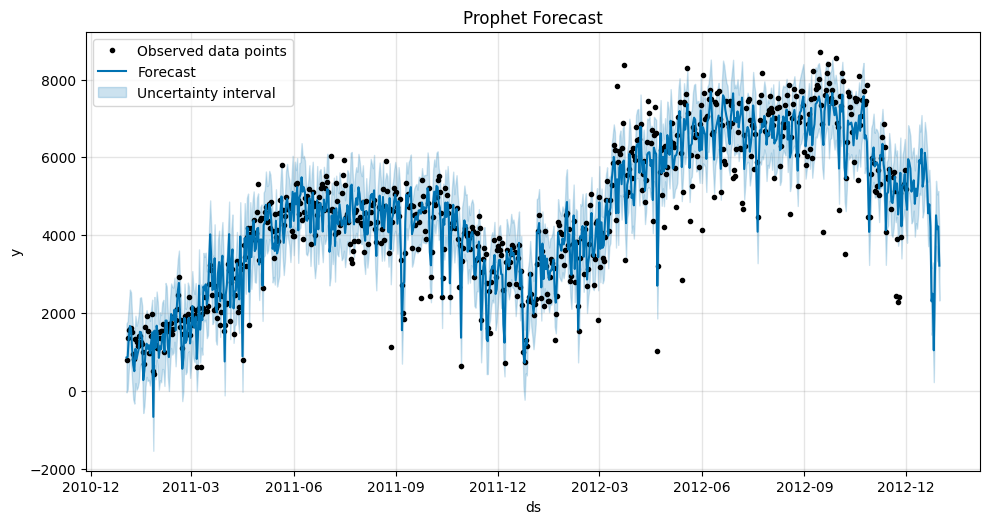

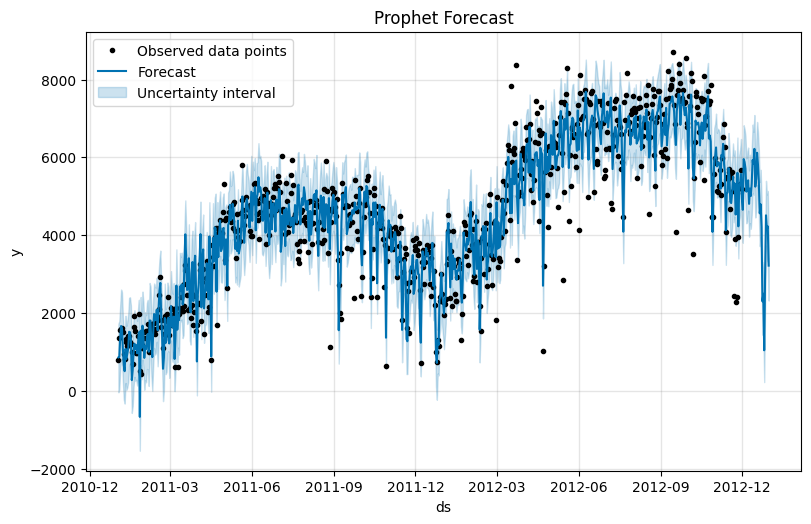

In [ ]:
# 1. Visualize the overall forecast
fig = m.plot(forecast)
plt.title("Prophet Forecast")
fig.set_size_inches(8, 5)
plt.legend()
plt.show()

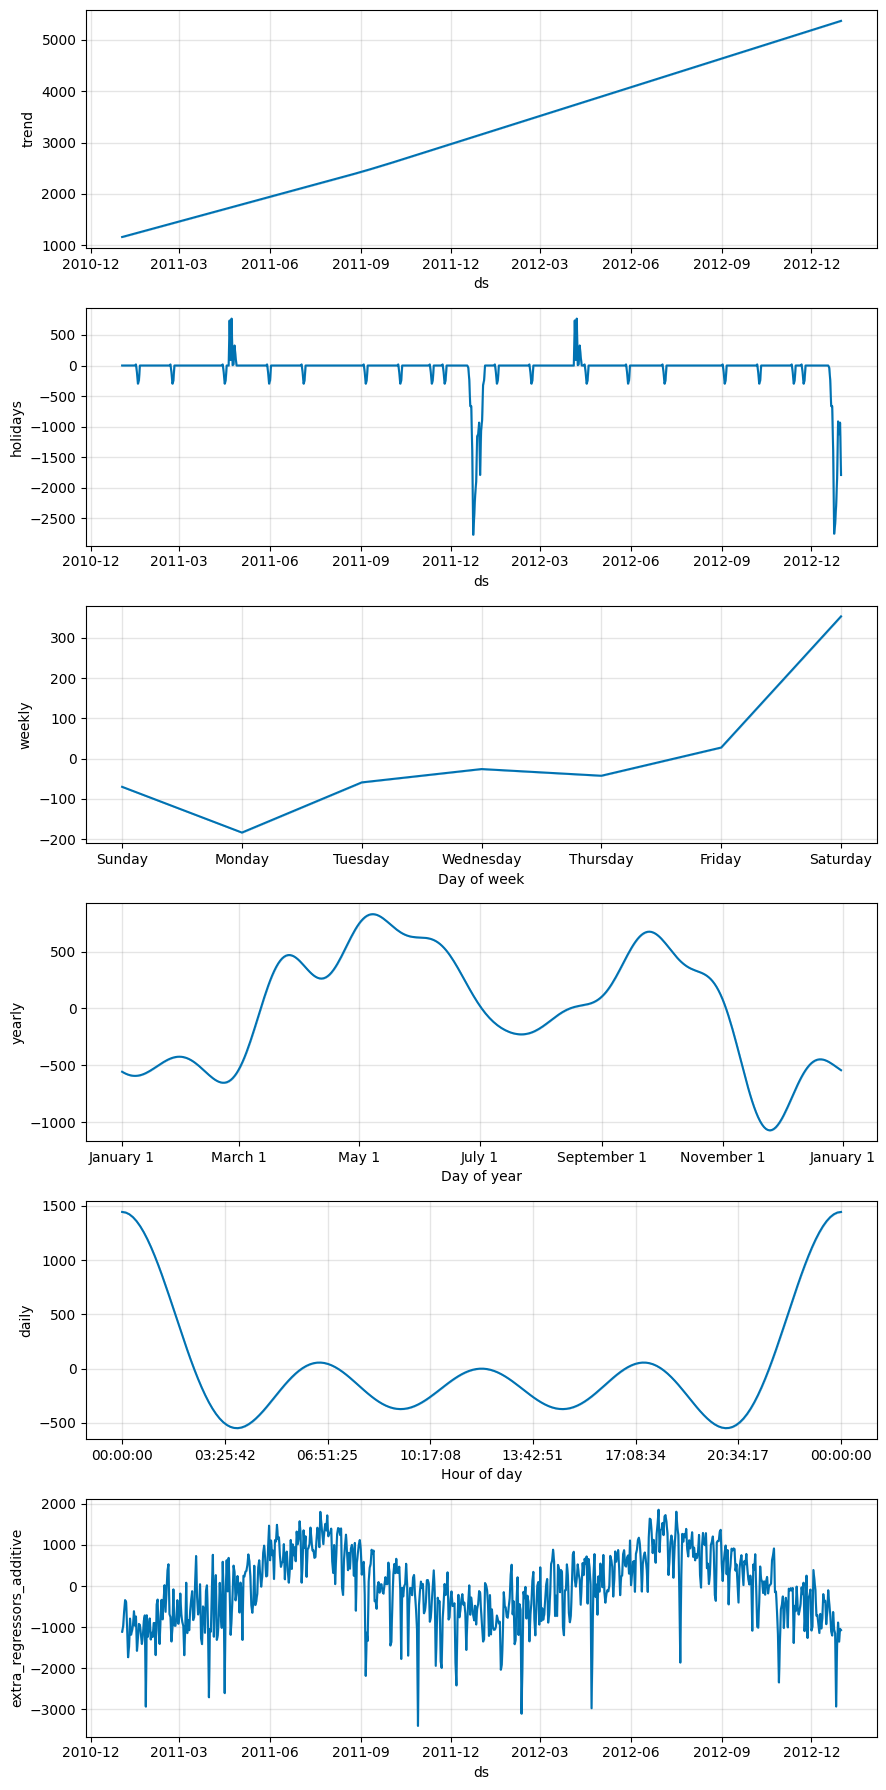

In [ ]:
# 2. Visualize the forecast components (trend, weekly seasonality, yearly seasonality, etc.)
fig2 = m.plot_components(forecast)
plt.show()

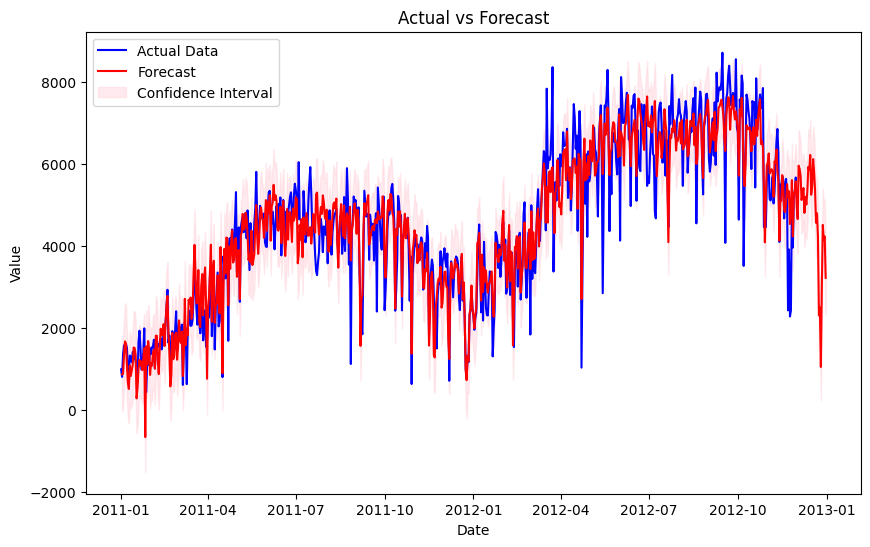

In [ ]:
# 3. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Actual Data', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3, label='Confidence Interval')
plt.title("Actual vs Forecast")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

## Cross Validation

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics
import seaborn as sns

# Perform cross-validation
df_cv = cross_validation(model=m,
                         horizon='30 days',
                         period='15 days',
                         initial='521 days')

# Calculate performance metrics
df_metrics = performance_metrics(df_cv)

# Display the metrics
print(df_metrics)

INFO:prophet:Making 10 forecasts with cutoffs between 2012-06-19 00:00:00 and 2012-11-01 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/v1a2ohpd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/n4wdl107.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58116', 'data', 'file=/tmp/tmp6gs6f14f/v1a2ohpd.json', 'init=/tmp/tmp6gs6f14f/n4wdl107.json', 'output', 'file=/tmp/tmp6gs6f14f/prophet_model9mwi3mic/prophet_model-20250124124235.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:42:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/12fq2pg3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6gs6f14f/erg67yjg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

   horizon           mse         rmse         mae      mape     mdape  \
0   3 days  1.369866e+06  1170.412651  947.311771  0.166855  0.131440   
1   4 days  1.235839e+06  1111.682829  866.979688  0.146410  0.119137   
2   5 days  1.308559e+06  1143.922511  891.837674  0.150911  0.109508   
3   6 days  9.110075e+05   954.467120  716.099090  0.117150  0.080778   
4   7 days  8.059094e+05   897.724557  678.490499  0.106577  0.076475   
5   8 days  5.376746e+05   733.262972  559.848681  0.079790  0.068191   
6   9 days  4.635438e+05   680.840485  551.753703  0.078631  0.074811   
7  10 days  6.968134e+05   834.753468  630.724205  0.092203  0.088696   
8  11 days  7.962876e+05   892.349488  662.711544  0.100834  0.085683   
9  12 days  1.025411e+06  1012.625779  776.169529  0.121726  0.093095   
10 13 days  8.490012e+05   921.412634  723.106554  0.112371  0.085683   
11 14 days  8.183547e+05   904.629591  741.983788  0.112917  0.102012   
12 15 days  6.462686e+05   803.908298  669.297467  

In [ ]:
rmse = round(performance_metrics(df_cv)['rmse'].mean(),2)
print(f'RMSE : {rmse}')
mape = round(performance_metrics(df_cv)['mape'].mean()*100,3)
print(f'MAPE : {mape}%')

RMSE : 981.47
MAPE : 13.216%


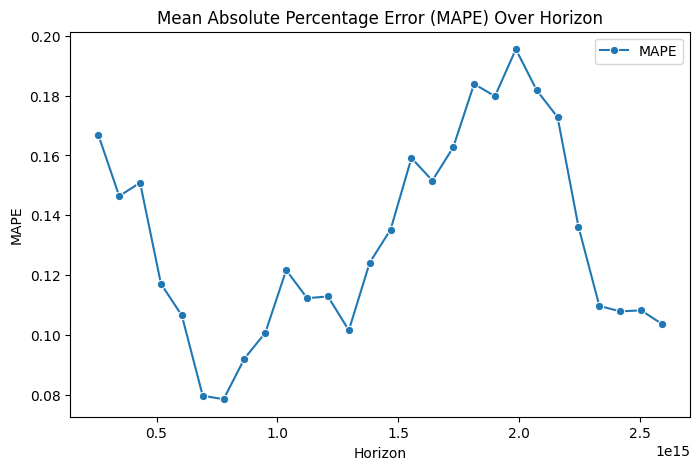

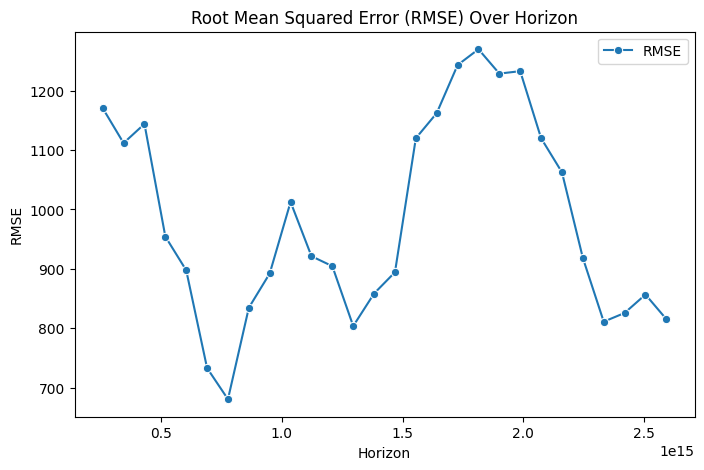

In [ ]:
# 1. Visualize evaluation metrics
# Plot MAPE
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_metrics, x="horizon", y="mape", marker="o", label="MAPE")
plt.title("Mean Absolute Percentage Error (MAPE) Over Horizon")
plt.xlabel("Horizon")
plt.ylabel("MAPE")
plt.legend()
plt.show()

# Plot RMSE
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_metrics, x="horizon", y="rmse", marker="o", label="RMSE")
plt.title("Root Mean Squared Error (RMSE) Over Horizon")
plt.xlabel("Horizon")
plt.ylabel("RMSE")
plt.legend()
plt.show()


In [ ]:
# 2. Custom Error Metrics for Actual vs Predicted
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extract actual and predicted values for the forecast horizon
actual = df_cv['y']
predicted = df_cv['yhat']

# Calculate custom error metrics
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 771.1901521586931
Root Mean Squared Error (RMSE): 992.9423671210267


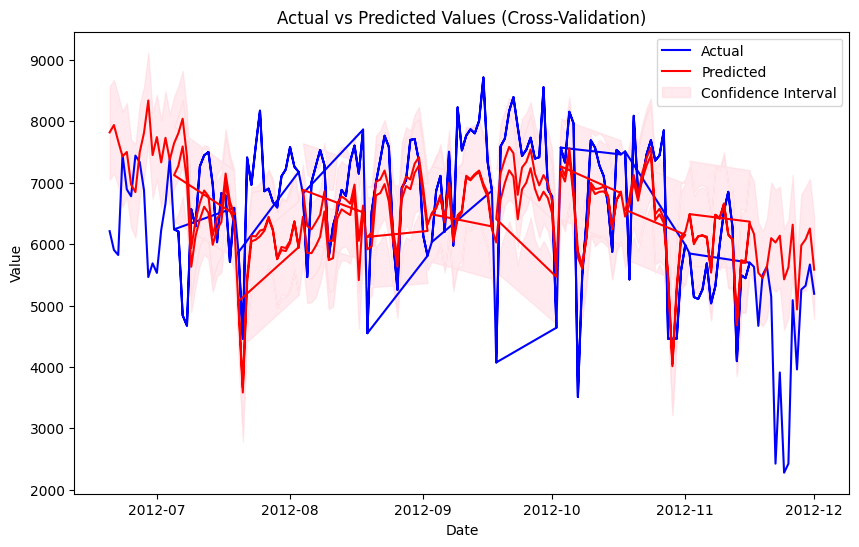

In [ ]:
# 3. Plot Actual vs Predicted values for better error visualization
plt.figure(figsize=(10, 6))
plt.plot(df_cv['ds'], actual, label='Actual', color='blue')
plt.plot(df_cv['ds'], predicted, label='Predicted', color='red')
plt.fill_between(df_cv['ds'], df_cv['yhat_lower'], df_cv['yhat_upper'], color='pink', alpha=0.3, label='Confidence Interval')
plt.title("Actual vs Predicted Values (Cross-Validation)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()